# Custom Regression Models: Implementation and Validation

## Imports

In [1]:
from linear_regression import *
import logistic_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Linear Regression: Implementation Check & Evaluation

In [2]:
## Create Data
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)
print(X[:5])
print(y[:5])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])


[[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
 [-0.79919201 -0.64596418 -0.18289644 -0.48274352  1.37487642]
 [ 1.07600714 -0.79602586 -0.75196933  0.02131165 -0.31905394]
 [-0.10325476 -0.82849702  1.48986344 -1.64318881 -1.60090398]
 [-2.06340315  0.50325206 -0.64557207 -0.31735049 -1.66108342]]
[ 70.77131405 -51.6042361  -37.00044751 -83.53509879 -83.4003936 ]
[[ 2.13685019  0.59941972  0.48200818 -1.17746225  0.42508706]
 [-0.83985275 -0.64738798 -0.18442975 -0.52167138  1.35320121]
 [ 1.11477879 -0.79673013 -0.75423247 -0.01167004 -0.2934164 ]
 [-0.11443599 -0.8290456   1.49047543 -1.69580607 -1.5394634 ]
 [-2.15761518  0.49631793 -0.64769876 -0.35432727 -1.59796198]]


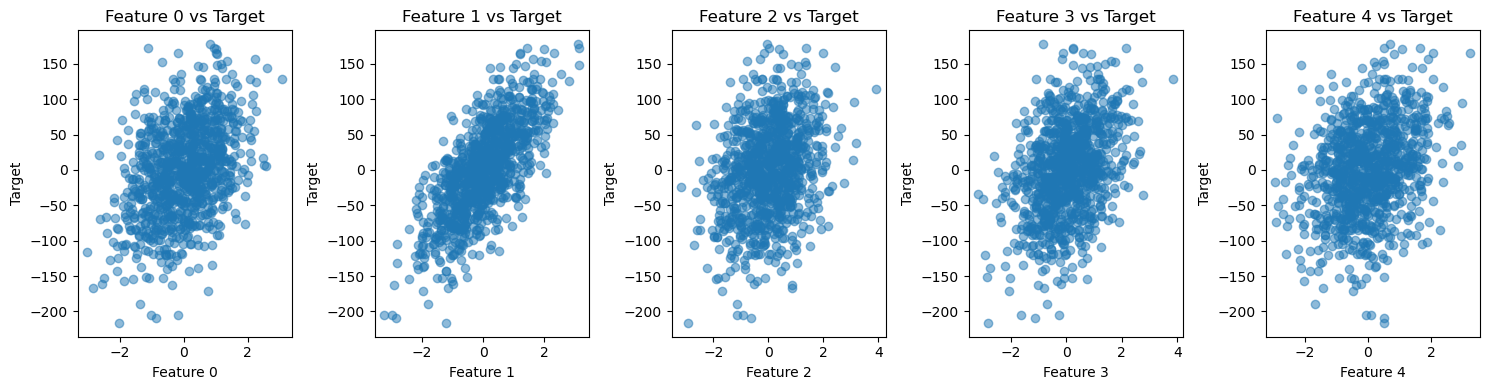

In [3]:
## Features vs Target

n_features = X.shape[1]

plt.figure(figsize=(15, 4))  # wide figure to fit multiple plots
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

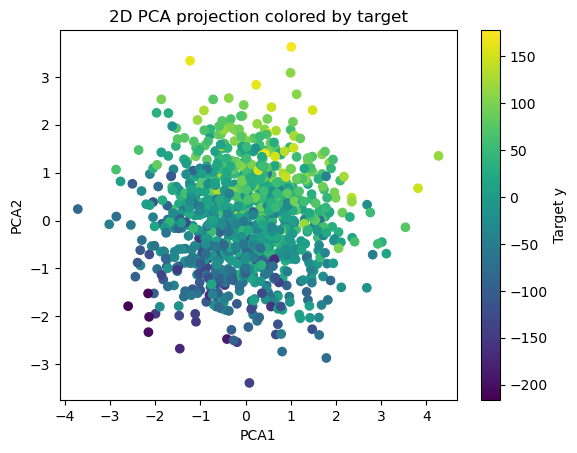

In [4]:
## Data Visulazation
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target y')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D PCA projection colored by target")
plt.show()

In [5]:
## Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

print(model.weights)
print(model.bias)


[-54.84766834 -64.70841086  50.87060891 -17.47844984  61.63782446]
[-49.53925994 -58.2262595   47.17114352  -4.06344173  56.86464899]
[26.76244245 46.10541398 16.64358041 24.24120934 19.69663536]
0.21758493432037773


In [7]:
# Evaluate model
mse, rmse = model.evaluate(X_test, y_test)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = np.sum((y_test - baseline_pred) ** 2) / (2 * y_test.shape[0])
baseline_rmse = np.sqrt(np.mean((y_test - baseline_pred) ** 2))

print("=== Normal Linear Regression ===")
print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Model MSE   : {mse:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Model RMSE   : {rmse:.4f}")
print(f"Target range : {y_test.min():.2f} to {y_test.max():.2f}\n")

=== Normal Linear Regression ===
Baseline MSE: 1916.3354
Model MSE   : 55.4834
Baseline RMSE: 61.9086
Model RMSE   : 10.5341
Target range : -160.93 to 164.99



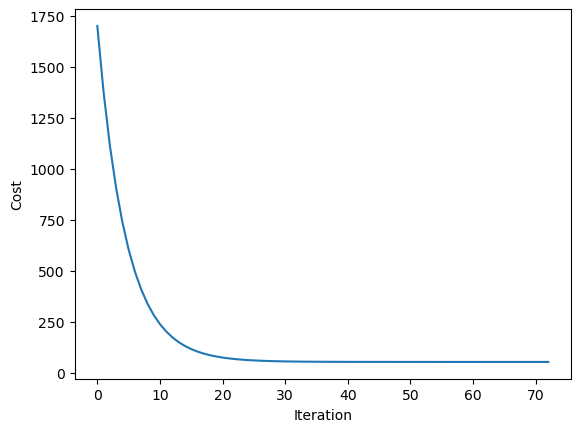

In [8]:
plt.plot(model.cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

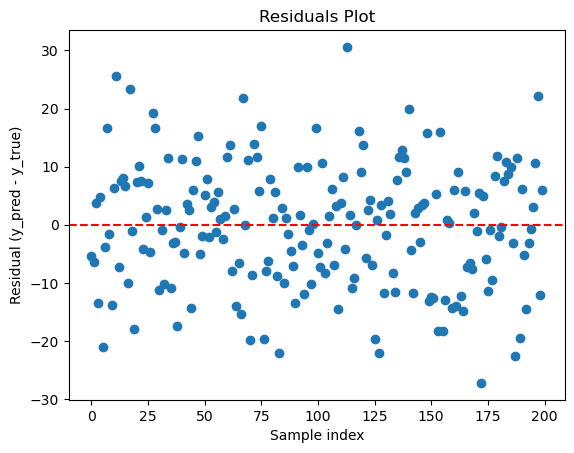

In [9]:
plt.scatter(range(len(y_test)), y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Sample index")
plt.ylabel("Residual (y_pred - y_true)")
plt.title("Residuals Plot")
plt.show()

### Effect of Noise on Linear Regression

Linear regression performs well when the features have a clear linear pattern with the target. With low noise, the model can capture this pattern, achieving lower MSE and RMSE than a simple baseline predicting the mean. However, as noise increases, random variation dominates, making it hard for the model to learn meaningful patterns. In very noisy datasets, the baseline may perform as well as or even better than the regression model.

## Linear Regression: With vs Without L2 Regularization

In [10]:
# Dataset 1: Easy (minimal difference)

X_easy, y_easy = make_regression(
    n_samples=500,   # moderate number of samples
    n_features=5,    # few features
    noise=10,        # low noise
    random_state=42
)

# Dataset 2: Challenging (noticeable difference)

X_chall, y_chall = make_regression(
    n_samples=500,
    n_features=20,   # many features
    noise=50,        # higher noise
    random_state=42
)

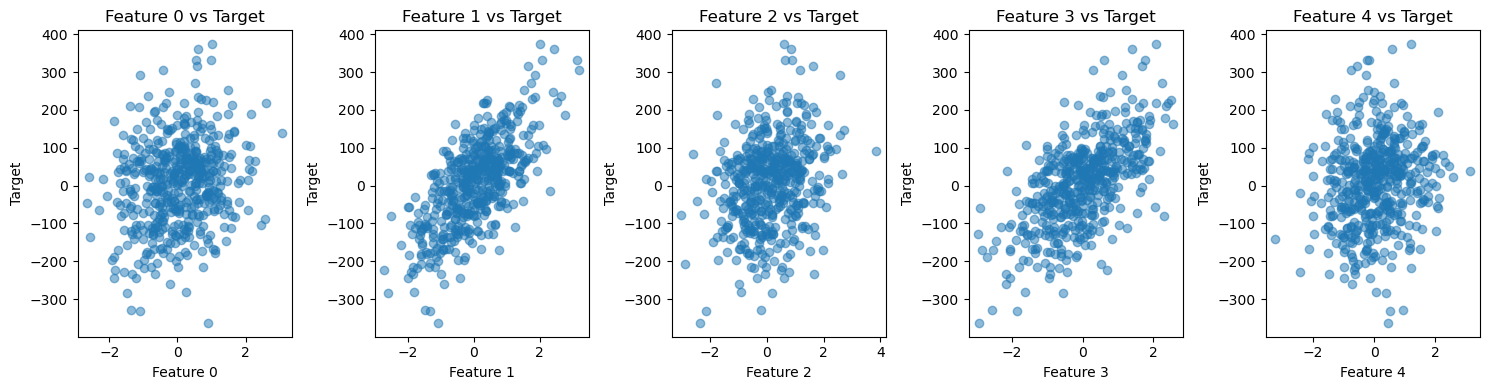

In [11]:
## Features vs Target

n_features = X_easy.shape[1]

plt.figure(figsize=(15, 4))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.scatter(X_easy[:, i], y_easy, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()


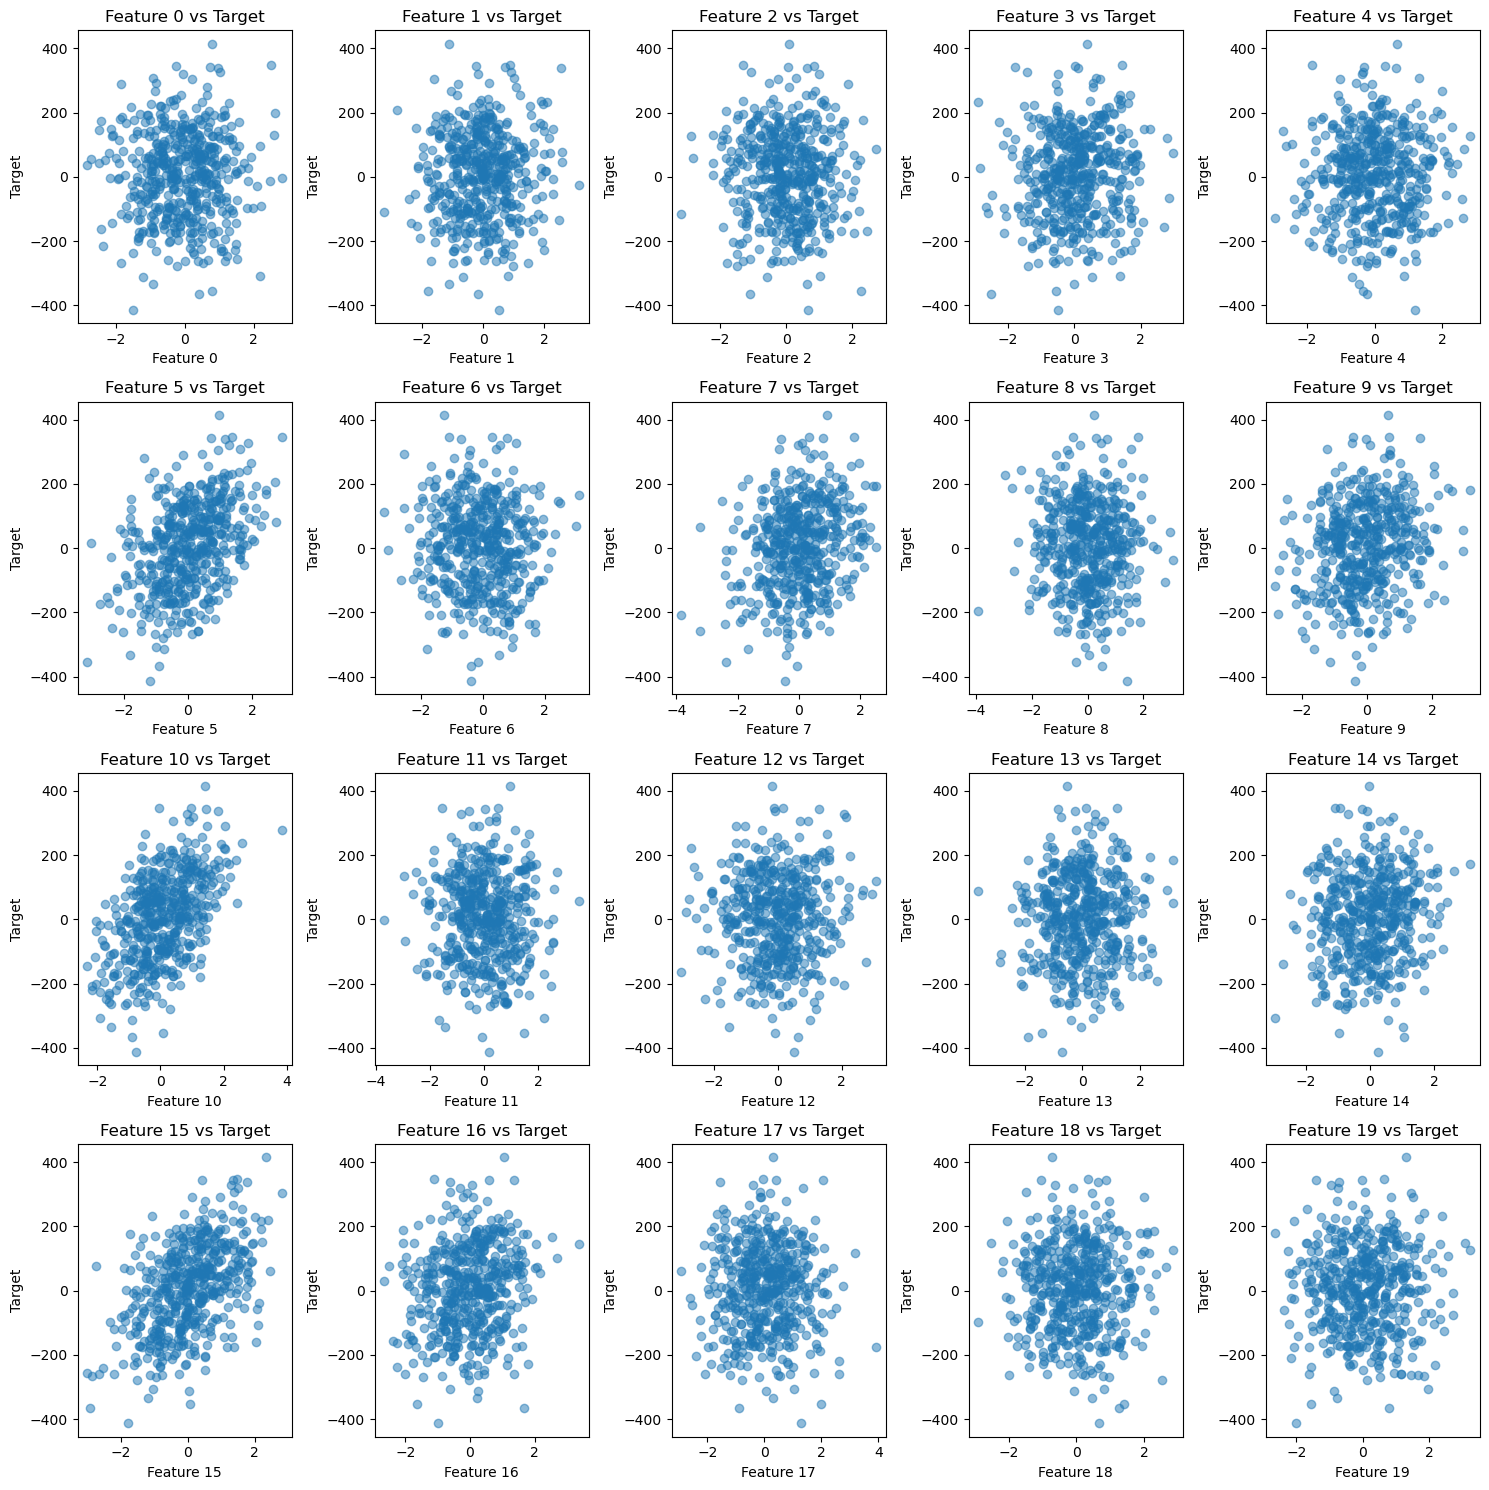

In [12]:
n_features = X_chall.shape[1]


plt.figure(figsize=(15, 15))

for i in range(n_features):
    plt.subplot(4, 5, i+1)
    plt.scatter(X_chall[:, i], y_chall, alpha=0.5)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Target")
    plt.title(f"Feature {i} vs Target")

plt.tight_layout()
plt.show()

In [13]:
scaler_easy = StandardScaler()
X_easy = scaler_easy.fit_transform(X_easy)

scaler_chall = StandardScaler()
X_chall = scaler_chall.fit_transform(X_chall)

X_train_easy, X_test_easy, y_train_easy, y_test_easy = train_test_split(X_easy, y_easy, test_size=0.2, random_state=42)
X_train_chall, X_test_chall, y_train_chall, y_test_chall = train_test_split(X_chall, y_chall, test_size=0.2, random_state=42)

In [18]:
# Train normal model in easy dataset
normal_model_easy = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0)
normal_model_easy.fit(X_train_easy, y_train_easy)
y_pred_normal = normal_model_easy.predict(X_test_easy)

print(y_pred_normal[:5])
print(y_test_easy[:5])
print("\n")

# Train Regularized model in easy dataset
regularized_model_easy = LinearRegression(learning_rate=0.1, iterations=1000,lambda_=0.01)
regularized_model_easy.fit(X_train_easy, y_train_easy)
y_pred_regularized = regularized_model_easy.predict(X_test_easy)

print(y_pred_regularized[:5])
print(y_test_easy[:5])
print("\n")

# Compare weights

print(f"Regularized weights: {regularized_model_easy.weights}")
print(f"Normal weights: {normal_model_easy.weights}\n")

# Compare bias
print(f"Regularized bias: {regularized_model_easy.bias}")
print(f"Normal bias: {normal_model_easy.bias}")

[ -38.20800639    6.5817077     7.45665907 -123.23648977   54.60507762]
[ -49.52212137   -2.54416639  -14.0915109  -117.6568234    61.79521615]


[ -38.20784276    6.58182581    7.45538441 -123.23319038   54.60338687]
[ -49.52212137   -2.54416639  -14.0915109  -117.6568234    61.79521615]


Regularized weights: [27.43755263 79.15703562 30.974359   71.30255377 10.39445186]
Normal weights: [27.43810043 79.15922293 30.97527612 71.30399759 10.39450882]

Regularized bias: 6.95625077740786
Normal bias: 6.956403523651245


In [19]:
# Evaluate Normal Model (Easy Dataset)
mse_normal, rmse_normal = normal_model_easy.evaluate(X_test_easy, y_test_easy)

baseline_pred = np.full_like(y_test_easy, y_train_easy.mean())
baseline_mse = np.sum((y_test_easy - baseline_pred) ** 2) / (2 * y_test_easy.shape[0])
baseline_rmse = np.sqrt(np.mean((y_test_easy - baseline_pred) ** 2))

print("=== Normal Linear Regression (Easy Dataset) ===")
print(f"Baseline MSE : {baseline_mse:.4f}")
print(f"Model MSE    : {mse_normal:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Model RMSE   : {rmse_normal:.4f}")
print(f"Target range : {y_test_easy.min():.2f} to {y_test_easy.max():.2f}\n")


# Evaluate Regularized Model (Easy Dataset)

mse_reg, rmse_reg = regularized_model_easy.evaluate(X_test_easy, y_test_easy)

print("=== Regularized Linear Regression (Easy Dataset) ===")
print(f"Baseline MSE : {baseline_mse:.4f}")
print(f"Model MSE    : {mse_reg:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Model RMSE   : {rmse_reg:.4f}")
print(f"Target range : {y_test_easy.min():.2f} to {y_test_easy.max():.2f}\n")

=== Normal Linear Regression (Easy Dataset) ===
Baseline MSE : 6102.5671
Model MSE    : 53.1475
Baseline RMSE: 110.4768
Model RMSE   : 10.3099
Target range : -260.86 to 330.76

=== Regularized Linear Regression (Easy Dataset) ===
Baseline MSE : 6102.5671
Model MSE    : 53.1455
Baseline RMSE: 110.4768
Model RMSE   : 10.3097
Target range : -260.86 to 330.76



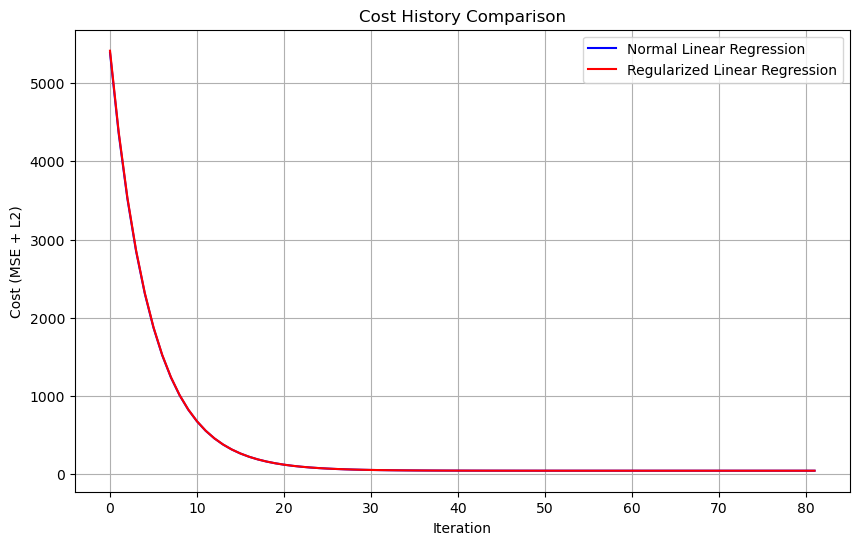

In [16]:
## Compare Cost History
cost_normal = normal_model_easy.cost_history
cost_regularized = regularized_model_easy.cost_history

plt.figure(figsize=(10,6))
plt.plot(cost_normal, label="Normal Linear Regression", color='blue')
plt.plot(cost_regularized, label="Regularized Linear Regression", color='red')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE + L2)")
plt.title("Cost History Comparison")
plt.legend()
plt.grid(True)
plt.show()

## Custom Linear Regression vs Scikit-Learn